In [1]:
# i work for text sentiments analysis score on amezone cell phone reviews
# import required library 

import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# import data set 
df = pd.read_csv("20191226-reviews.csv")

In [3]:
df.head()

,asin,name,rating,date,verified,title,body,helpfulVotes
0,B0000SX2UC,Janet,3,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,Luke Wyatt,1,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,Brooke,5,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,amy m. teague,3,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,tristazbimmer,4,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


In [4]:
# now we only download as required data only(columns)
df = pd.read_csv("20191226-reviews.csv", usecols=["body"])
df.head()

,body
0,I had the Samsung A600 for awhile which is abs...
1,Due to a software issue between Nokia and Spri...
2,"This is a great, reliable phone. I also purcha..."
3,"I love the phone and all, because I really did..."
4,The phone has been great for every purpose it ...


In [5]:
df.shape

(67986, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67986 entries, 0 to 67985
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   body    67965 non-null  object
dtypes: object(1)
memory usage: 531.3+ KB


In [7]:
# we create instance of WordNetLemmatizer also call stop words from nltk lbrary
lemma = WordNetLemmatizer()
stop_words = stopwords.words("english")

In [8]:
# def function to process the text -> extract -> tiokenie string -> filter(stopwords) -> lemmatized

def text_prep(x):
    corp =  str(x).lower()
    corp = re.sub("[^a-zA-Z]+"," ",corp).strip()
    tokens = word_tokenize(corp)
    words = [ t for t in tokens if t not in stop_words]
    lemmatize = [lemma.lemmatize(w) for w in words]
    
    return lemmatize

In [9]:
# this function apply every (text)reviews of body column

process_tag = [text_prep(i) for i in df['body']]
df['process_txt'] = process_tag
df.head()

,body,process_txt
0,I had the Samsung A600 for awhile which is abs...,"[samsung, awhile, absolute, doo, doo, read, re..."
1,Due to a software issue between Nokia and Spri...,"[due, software, issue, nokia, sprint, phone, t..."
2,"This is a great, reliable phone. I also purcha...","[great, reliable, phone, also, purchased, phon..."
3,"I love the phone and all, because I really did...","[love, phone, really, need, one, expect, price..."
4,The phone has been great for every purpose it ...,"[phone, great, every, purpose, offer, except, ..."


In [10]:
# count lenth of word for help in senitment score

df['total_len'] = df['process_txt'].map(lambda x : len(x))

In [11]:
df.head()

,body,process_txt,total_len
0,I had the Samsung A600 for awhile which is abs...,"[samsung, awhile, absolute, doo, doo, read, re...",162
1,Due to a software issue between Nokia and Spri...,"[due, software, issue, nokia, sprint, phone, t...",67
2,"This is a great, reliable phone. I also purcha...","[great, reliable, phone, also, purchased, phon...",68
3,"I love the phone and all, because I really did...","[love, phone, really, need, one, expect, price...",41
4,The phone has been great for every purpose it ...,"[phone, great, every, purpose, offer, except, ...",56


In [12]:
with open("positive-word.txt","r") as fp:
    pos_words = fp.read()

In [13]:
with open("negitive-word.txt","r") as fp:
    neg_words = fp.read()

In [14]:
pos_words =pos_words.split("\n")

In [15]:
neg_words = neg_words.split("\n")

In [16]:
print(len(pos_words));len(neg_words)

2006


4783

In [17]:
# count postive word and negative words
num_pos = df["process_txt"].map(lambda x : len([ i  for i in x if i in pos_words]))
df["pos_count"] = num_pos

In [18]:
num_neg = df['process_txt'].map(lambda x : len([i for i in x if i in neg_words]))
df['neg_count'] = num_neg

In [20]:
# finally we create sentiment column
df['sentiment'] = round((df['pos_count'] - df['neg_count'])/df["total_len"],2)

In [21]:
df.head(30)

,body,process_txt,total_len,pos_count,neg_count,sentiment
0,I had the Samsung A600 for awhile which is abs...,"[samsung, awhile, absolute, doo, doo, read, re...",162,18,18,0.00
1,Due to a software issue between Nokia and Spri...,"[due, software, issue, nokia, sprint, phone, t...",67,8,3,0.07
2,"This is a great, reliable phone. I also purcha...","[great, reliable, phone, also, purchased, phon...",68,10,4,0.09
3,"I love the phone and all, because I really did...","[love, phone, really, need, one, expect, price...",41,3,0,0.07
4,The phone has been great for every purpose it ...,"[phone, great, every, purpose, offer, except, ...",56,5,3,0.04
5,"Hello, I have this phone and used it until I d...","[hello, phone, used, decided, buy, flip, phone...",35,4,1,0.09
6,Cool. Cheap. Color: 3 words that describe the ...,"[cool, cheap, color, word, describe, nokia, pe...",81,12,5,0.09
7,"The 3599i is overall a nice phone, except that...","[overall, nice, phone, except, nokia, made, un...",34,2,1,0.03
8,"I've never owned a Nokia phone before, so this...","[never, owned, nokia, phone, first, really, li...",26,5,0,0.19
9,ok well im in school and i need the text messa...,"[ok, well, im, school, need, text, messaging, ...",46,2,1,0.02


<AxesSubplot:>

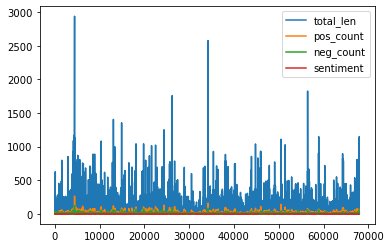

In [22]:
df.plot()